In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats 

import scipy
import seaborn as sns
import matplotlib.pylab as plt
# parametri
N=2000
rho0=scipy.zeros(N)
rho0[1]=1.
beta=0.001
time=scipy.array([0.,8.,10.])
Gamma2_initial=0.55
#leggiamo i dati
day8size=scipy.genfromtxt("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/Cancer-day8size.dat",dtype='i4')
day10size=scipy.genfromtxt("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/Cancer-day10size.dat",dtype='i4')    

C:\Users\Francesco\AppData\Local\Temp\ipykernel_18288\3531666469.py:11: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  rho0=scipy.zeros(N)
C:\Users\Francesco\AppData\Local\Temp\ipykernel_18288\3531666469.py:14: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  time=scipy.array([0.,8.,10.])
C:\Users\Francesco\AppData\Local\Temp\ipykernel_18288\3531666469.py:17: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  day8size=scipy.genfromtxt("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/Cancer-day8size.dat",dtype='i4')
C:\Users\Francesco\AppData\Local\Temp\ipykernel_18288\3531666469.py:18: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  day10size=scipy.genfromtxt("https://github.com/SZapperi/CorsoProbabilitaStatist

In [5]:
data=scipy.concatenate((day8size,day10size)) 
# definiamo la p(S|t,gamma) per t=8 (rho8) e t=10 (rho10)
def rhos(Gamma2):
    rho8=scipy.zeros(N)
    for n in range(0,N):
        e8=scipy.exp((Gamma2-beta)*8.)
        rho8[n]=(e8*((Gamma2-beta)/(Gamma2*e8-beta))**2)*(1-(Gamma2-beta)/(Gamma2*e8-beta))**(n-1)
    rho8[0]=0.
    rho10=scipy.zeros(N)
    for n in range(0,N):
        e10=scipy.exp((Gamma2-beta)*10.)
        rho10[n]=(e10*((Gamma2-beta)/(Gamma2*e10-beta))**2)*(1-(Gamma2-beta)/(Gamma2*e10-beta))**(n-1)
    rho10[0]=0.

    return rho8,rho10
# funzione che calcola la Likelihood (con il segno meno)
def likelihood(Gamma2):
    rho8,rho10=rhos(Gamma2)
    likelihood=0.
    for i in range(len(day8size)):
        likelihood+=-scipy.log(rho8[day8size[i]])
    for i in  range(len(day10size)):
        likelihood+=-scipy.log(rho10[day10size[i]])
    return likelihood
#troviamo il massimo della Likelihood (calcoliamo il minimo di -L)


C:\Users\Francesco\AppData\Local\Temp\ipykernel_18288\253707906.py:1: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  data=scipy.concatenate((day8size,day10size))


C:\Users\Francesco\AppData\Local\Temp\ipykernel_18288\253707906.py:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  rho8=scipy.zeros(N)
C:\Users\Francesco\AppData\Local\Temp\ipykernel_18288\253707906.py:6: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  e8=scipy.exp((Gamma2-beta)*8.)
C:\Users\Francesco\AppData\Local\Temp\ipykernel_18288\253707906.py:9: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  rho10=scipy.zeros(N)
C:\Users\Francesco\AppData\Local\Temp\ipykernel_18288\253707906.py:11: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  e10=scipy.exp((Gamma2-beta)*10.)
C:\Users\Francesco\AppData\Local\Temp\ipykernel_18288\253707906.py:21: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  lik

0.5562952908989527 19699.30247119197


C:\Users\Francesco\AppData\Local\Temp\ipykernel_18288\1964164736.py:7: DeprecationWarning: scipy.cumsum is deprecated and will be removed in SciPy 2.0.0, use numpy.cumsum instead
  rho8cum=scipy.cumsum(rho8)
C:\Users\Francesco\AppData\Local\Temp\ipykernel_18288\1964164736.py:8: DeprecationWarning: scipy.cumsum is deprecated and will be removed in SciPy 2.0.0, use numpy.cumsum instead
  rho10cum=scipy.cumsum(rho10)


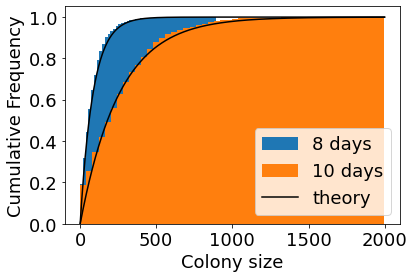

In [6]:
bestfit=scipy.optimize.brent(likelihood,brack=(0.4,Gamma2_initial,0.7))
Gamma2_best=bestfit
print(Gamma2_best,likelihood(Gamma2_best))
rho8,rho10=rhos(Gamma2_best)
#Confrontiamo il fit con i dati considerando la distribuzione cumulata

rho8cum=scipy.cumsum(rho8)
rho10cum=scipy.cumsum(rho10)
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
plt.hist(day8size, cumulative=True, density=True, bins=50,
        label="8 days")
plt.hist(day10size, cumulative=True, density=True, bins=50,
        label="10 days")
#plt.step(y8,idx8, label="8 days", color="yellow") # dati sperimentali 8gg
#plt.step(y10,idx10, label="10 days", color="red") # dati sperimentali 8gg
plt.plot(rho8cum, color="black", label="theory")
plt.plot(rho10cum, color="black")
plt.xlabel('Colony size')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.show()

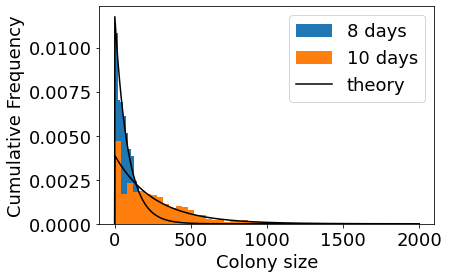

In [11]:

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
plt.hist(day8size, density=True, bins=50,
        label="8 days")
plt.hist(day10size, density=True, bins=50,
        label="10 days")
#plt.step(y8,idx8, label="8 days", color="yellow") # dati sperimentali 8gg
#plt.step(y10,idx10, label="10 days", color="red") # dati sperimentali 8gg
plt.plot(rho8, color="black", label="theory")
plt.plot(rho10, color="black")
plt.xlabel('Colony size')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.show()